In [33]:
# Лабораторная работа 5_1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    average_precision_score
)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [34]:
# Загрузка данных
try:
    df = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    print("Файл 'diabetes.csv' не найден. Пожалуйста, загрузите его с Kaggle: https://www.kaggle.com/datasets/saurabh00007/diabetescsv")
    df = None


In [35]:
if df is not None:
    # Просмотр первых строк данных
    print("Первые 5 строк данных:")
    display(df.head())

    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Масштабирование признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

Первые 5 строк данных:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Задание 1: Сравнение логистической регрессии и решающего дерева

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Решающее дерево (стандартные параметры)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Функция для вывода метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"\nМетрики для модели {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nМатрица ошибок:")
    print(confusion_matrix(y_true, y_pred))
    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred))

# Вывод метрик для обеих моделей
print_metrics(y_test, y_pred_log, "Логистическая регрессия")
print_metrics(y_test, y_pred_tree, "Решающее дерево")


Метрики для модели Логистическая регрессия:
Accuracy: 0.7359
Precision: 0.6173
Recall: 0.6250
F1-score: 0.6211

Матрица ошибок:
[[120  31]
 [ 30  50]]

Отчет классификации:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Метрики для модели Решающее дерево:
Accuracy: 0.7013
Precision: 0.5556
Recall: 0.6875
F1-score: 0.6145

Матрица ошибок:
[[107  44]
 [ 25  55]]

Отчет классификации:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



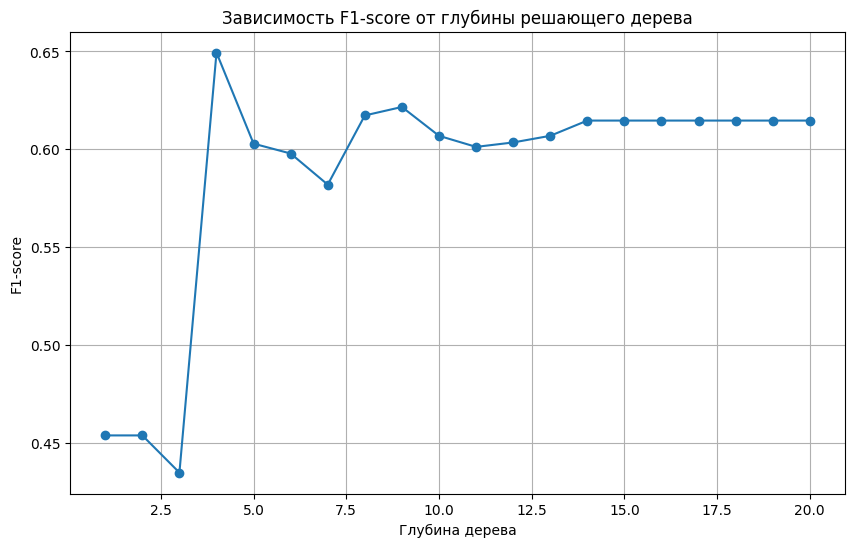

Оптимальная глубина дерева: 4 (F1-score = 0.6492)


In [43]:
# Задание 2: Исследование зависимости метрики от глубины дерева

# Выберем F1-score как метрику
max_depth_values = range(1, 21)
f1_scores = []

for depth in max_depth_values:
    tree_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_depth.fit(X_train, y_train)
    y_pred_depth = tree_depth.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred_depth))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, f1_scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины решающего дерева')
plt.grid()
plt.show()

# Определение оптимальной глубины
optimal_depth = max_depth_values[np.argmax(f1_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth} (F1-score = {max(f1_scores):.4f})")

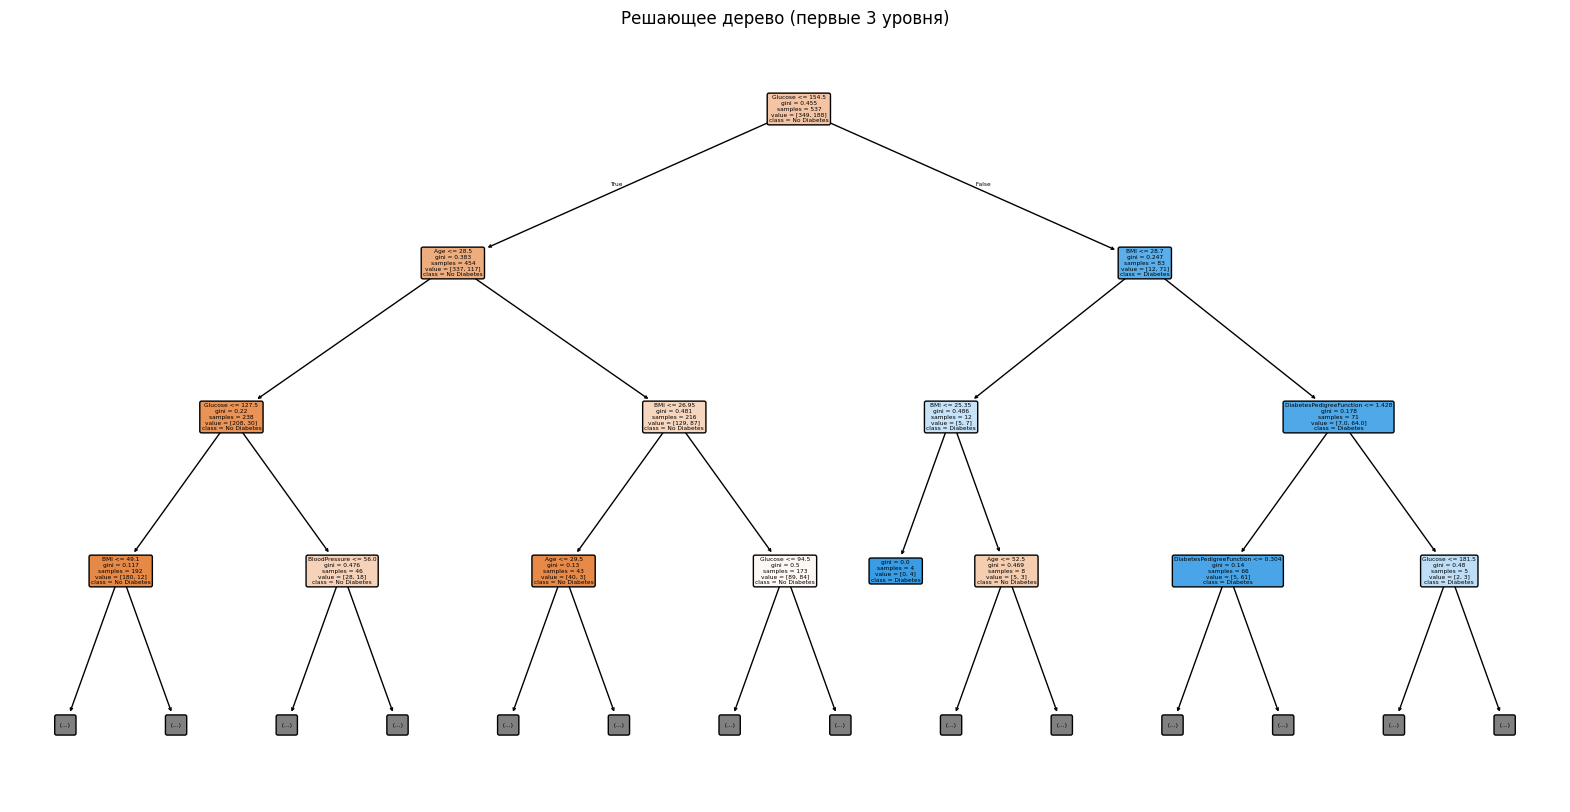

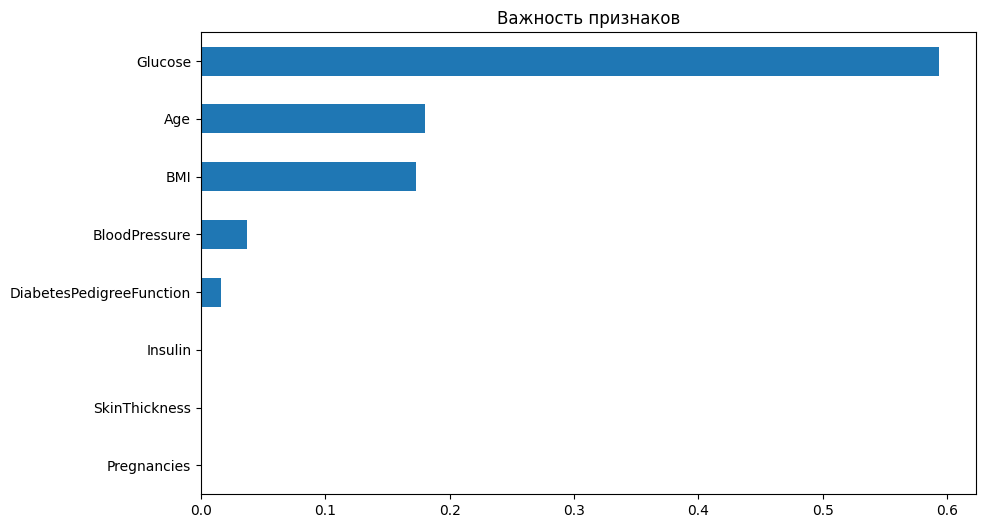

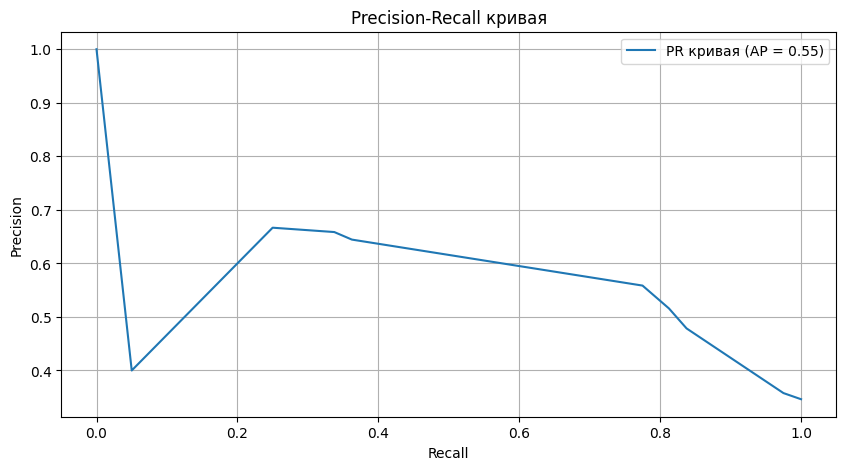

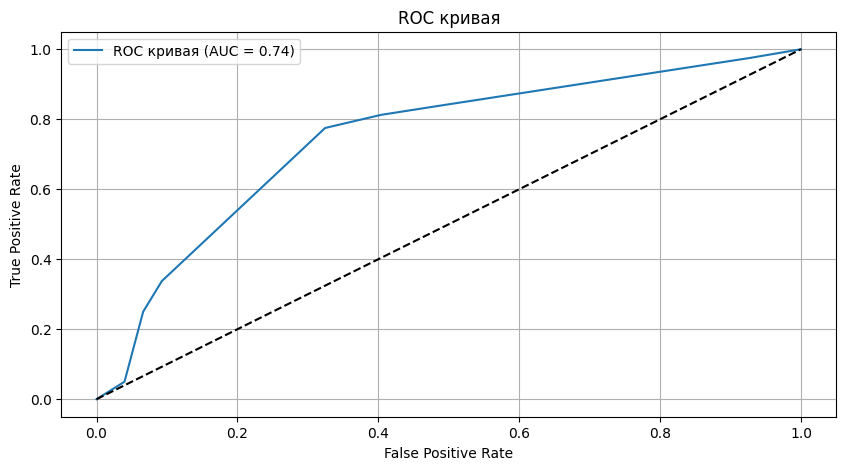

In [44]:
# Задание 3: Анализ модели с оптимальной глубиной

# Создание и обучение модели с оптимальной глубиной
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X_train, y_train)

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          max_depth=3)  # Ограничиваем глубину для наглядности
plt.title("Решающее дерево (первые 3 уровня)")
plt.show()

# Важность признаков
feature_importances = pd.Series(optimal_tree.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков')
plt.show()

# PR и ROC кривые
y_probs = optimal_tree.predict_proba(X_test)[:, 1]

# PR кривая
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label=f'PR кривая (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend()
plt.grid()
plt.show()

# ROC кривая
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend()
plt.grid()
plt.show()

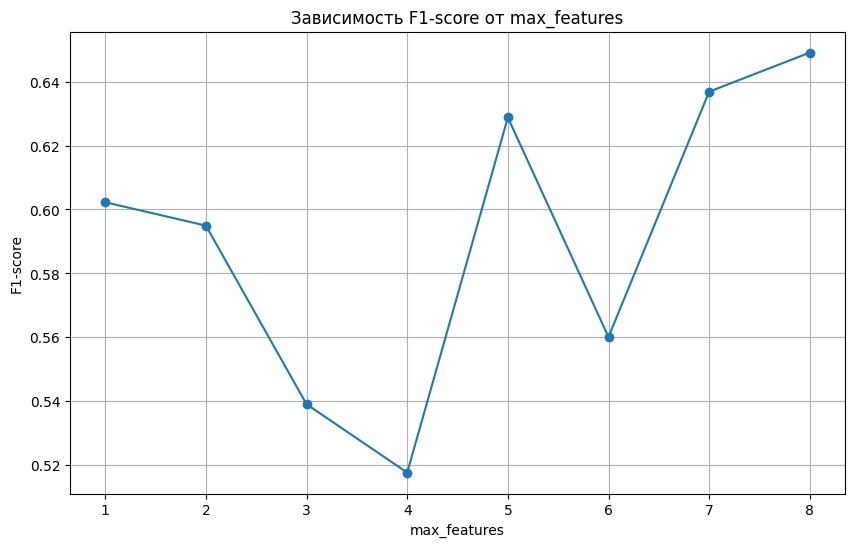

In [51]:
#Задание 4: Исследование зависимости метрики от других параметров

# Пример: исследование зависимости от max_features
max_features_options = range(1, X.shape[1] + 1)
f1_scores_features = []

for n_features in max_features_options:
    tree_features = DecisionTreeClassifier(max_depth=optimal_depth,
                                          max_features=n_features,
                                          random_state=42)
    tree_features.fit(X_train, y_train)
    y_pred_features = tree_features.predict(X_test)
    f1_scores_features.append(f1_score(y_test, y_pred_features))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_features_options, f1_scores_features, marker='o')
plt.xlabel('max_features')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от max_features')
plt.xticks(max_features_options)
plt.grid()
plt.show()